
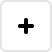
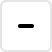
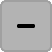
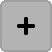
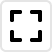
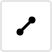
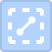
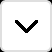
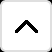
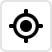
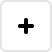
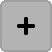
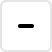
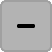
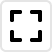
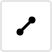
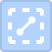
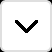
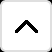
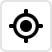

In [1]:
from IPython.display import SVG, Image, HTML, clear_output
import PIL
import os
import pandas as pd
import numpy as np

from lets_plot import *
LetsPlot.setup_html()

In [2]:
def show(p, name):
    img = ggsave(p, name + ".bmp")
    out_dir = os.path.dirname(img)
    png_img = os.path.join(out_dir, name + '.png')
    PIL.Image.open(img).save(png_img)

    display(HTML("<h4>SVG</h4>"))
    p.show()

    display(HTML("<h4>ImageMagick</h4>"))
    return display(Image(png_img))

# Basic plots

Fontconfig warning: "/home/ikupriyanov/.fonts.conf", line 11: invalid attribute 'name'


Unsupported attribute `fill-rule` in Path
Unsupported attribute `clip-bounds-jfx` in Group
Image saved to /home/ikupriyanov/Projects/lets-plot/docs/dev/notebooks/lets-plot-images/magick_barplot.bmp


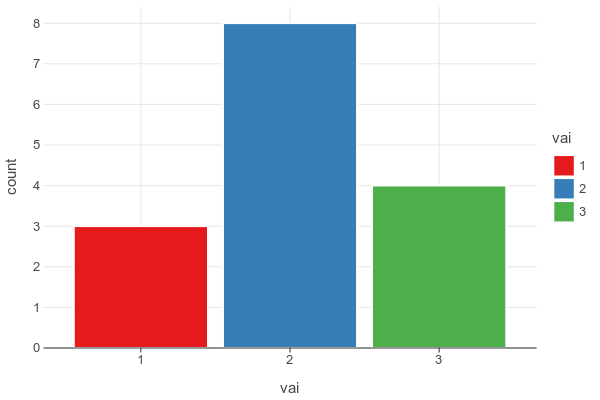

In [3]:
barplot_df = {
    'val': ['3', '1', '2', '3', '1', '3', '2', '1', '3', '2', '2', '2', '2', '2', '2'],
    'vai': [3, 1,2, 3, 1, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2]
}
p = ggplot(barplot_df) + geom_bar(aes(x=as_discrete('vai'), fill=as_discrete('vai', levels=[1, 2, 3])))

show(p, "magick_barplot")

# Path


Unsupported attribute `fill-rule` in Path
Unsupported attribute `clip-bounds-jfx` in Group
Unsupported attribute `fill-rule` in Path
Unsupported attribute `clip-bounds-jfx` in Group
Image saved to /home/ikupriyanov/Projects/lets-plot/docs/dev/notebooks/lets-plot-images/magick_path.bmp


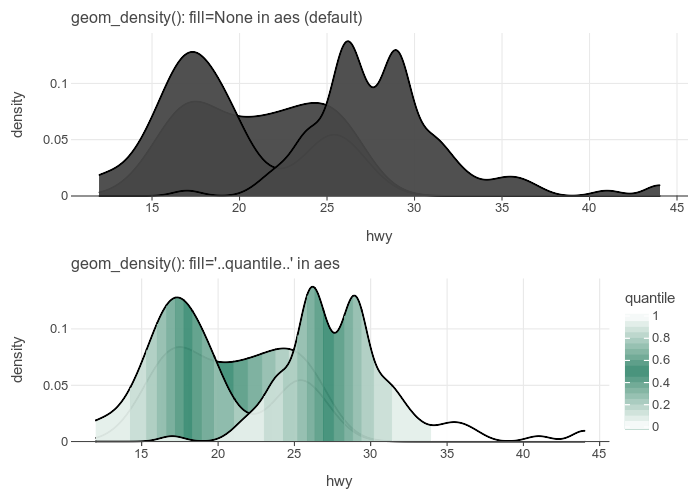

In [4]:
mpg = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv')

common_args = {'color': "black", 'alpha': .95}
quantiles = np.linspace(0, 1, 15)
fill_diverging = scale_fill_gradient2(low="white", mid="#3F8F77", high="white", midpoint=0.5)

p = ggplot(mpg, aes("hwy", group="drv"))
p1 = p + geom_density(**common_args) + \
    ggtitle("geom_density(): fill=None in aes (default)")
p2 = p + geom_density(aes(fill='..quantile..'), quantiles=quantiles, **common_args) + fill_diverging + \
    ggtitle("geom_density(): fill='..quantile..' in aes")
p = gggrid([p1, p2], ncol=1) + ggsize(700, 500)

show(p, "magick_path")

# Variadic Path


Unsupported attribute `fill-rule` in Path
Unsupported attribute `clip-bounds-jfx` in Group
Image saved to /home/ikupriyanov/Projects/lets-plot/docs/dev/notebooks/lets-plot-images/magick_variadic_path.bmp.bmp


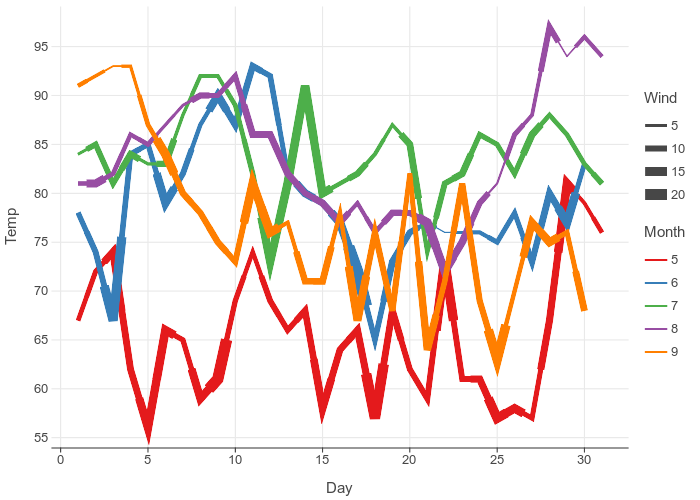

In [5]:
airquality_df = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/airquality.csv")
p = ggplot(airquality_df) \
    + geom_line(
        aes(
            x = 'Day', 
            y = 'Temp', 
            size = 'Wind', # <--- wind varies by day
            color = as_discrete('Month')
        )
    ) \
    + scale_size([0.5, 5.0]) \
    + ggsize(700, 500)

show(p, "magick_variadic_path.bmp")

# Fonts


Unsupported attribute `fill-rule` in Path
Unsupported attribute `clip-bounds-jfx` in Group
Image saved to /home/ikupriyanov/Projects/lets-plot/docs/dev/notebooks/lets-plot-images/magick_fonts.bmp.bmp


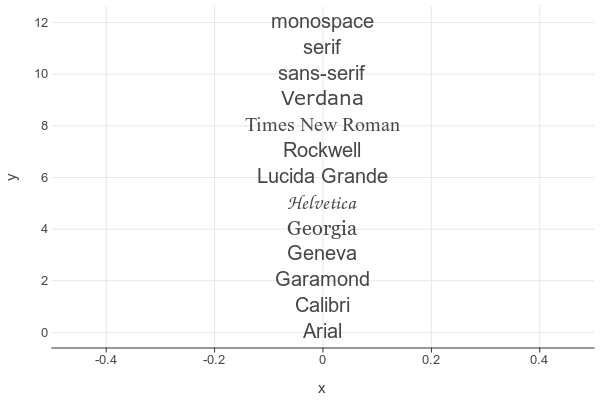

In [6]:
fonts = {
    "y": [ 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0 ],
    "label": [ "Arial", "Calibri", "Garamond", "Geneva", "Georgia", "Helvetica", "Lucida Grande", "Rockwell", "Times New Roman", "Verdana", "sans-serif", "serif", "monospace" ],
    "family": [ "Arial", "Calibri", "Garamond", "Geneva", "Georgia", "Helvetica", "Lucida Grande", "Rockwell", "Times New Roman", "Verdana", "sans-serif", "serif", "monospace" ]
}

p = ggplot(fonts, aes(y='y', label='label', family='family')) + geom_text(size=10)

show(p, "magick_fonts.bmp")

# Markdown


Unsupported attribute `fill-rule` in Path
Unsupported attribute `clip-bounds-jfx` in Group
Unsupported attribute `font-weight` in TSpan
Unsupported attribute `font-weight` in TSpan
Unsupported attribute `font-weight` in TSpan
Unsupported attribute `font-weight` in TSpan
Unsupported attribute `font-weight` in TSpan
Unsupported attribute `font-weight` in TSpan
Unsupported attribute `font-weight` in TSpan
Unsupported attribute `font-weight` in TSpan
Unsupported attribute `font-weight` in TSpan
Unsupported attribute `font-weight` in TSpan
Unsupported attribute `font-style` in TSpan
Unsupported attribute `font-weight` in TSpan
Unsupported attribute `font-weight` in TSpan
Unsupported attribute `font-style` in TSpan
Unsupported attribute `font-weight` in TSpan
Unsupported attribute `font-weight` in TSpan
Unsupported attribute `font-style` in TSpan
Unsupported attribute `font-weight` in TSpan
Unsupported attribute `font-weight` in TSpan
Unsupported attribute `font-style` in TSpan
Unsupported 

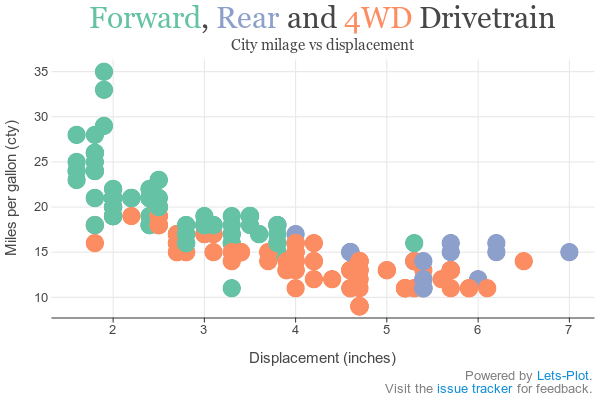

In [7]:
markdown_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
markdown_df.drop(columns=["Unnamed: 0"], inplace=True)

p = (ggplot(markdown_df) 
    + geom_point(aes(x='displ', y='cty', color='drv'), size=8) 
    + scale_color_manual(['#66c2a5', '#fc8d62', '#8da0cb'], guide='none') 

    # Enable Markdown in all titles
    + theme(title=element_markdown()) 

    # Adjust style of title and subtitle
    + theme(plot_title=element_text(size=30, family='Georgia', hjust=0.5), 
            plot_subtitle=element_text(family='Georgia', hjust=0.5)) 

    + labs(

        # Span styling, mixing style and emphasis
        title=
            """<span style="color:#66c2a5">**Forward**</span>, """
            """<span style="color:#8da0cb">**Rear**</span> and """
            """<span style="color:#fc8d62">**4WD**</span> Drivetrain""",

        # Simple emphasis
        subtitle='**City milage** *vs* **displacement**', 

        # multiline caption, multiline style span, links 
        caption="<span style='color:grey'>"
                "Powered by <a href='https://lets-plot.org'>Lets-Plot</a>.  \n"
                "Visit the <a href='https://github.com/jetbrains/lets-plot/issues'>issue tracker</a> for feedback." 
                "</span>",

        # Axis titles
        x='Displacement (***inches***)',
        y='Miles per gallon (***cty***)'
    )
)

show(p, "magick_markdown")

# Pie


Unsupported attribute `fill-rule` in Path
Unsupported attribute `clip-bounds-jfx` in Group
Image saved to /home/ikupriyanov/Projects/lets-plot/docs/dev/notebooks/lets-plot-images/magick_pie.bmp


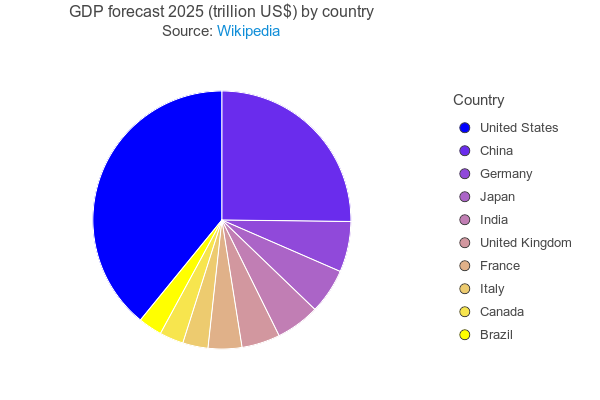

In [8]:
pie_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot/refs/heads/master/docs/f-25a/data/gdp_forecast_2025_trillion_usd.csv", encoding ='utf-8')
p = ggplot(pie_df, aes(fill='Country', slice='GDP_2025_Trillion_USD')) \
    + geom_pie(size=.6, size_unit='x', stat='identity') \
    + ggtitle('GDP forecast 2025 (trillion US$) by country', 
              subtitle='Source: <a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)">Wikipedia</a>') \
    + scale_fill_gradient(low="blue", high="yellow") \
    + theme_void() + theme(plot_title=element_text(hjust=0.5), plot_subtitle=element_text(hjust=0.5))

show(p, "magick_pie")

# Power degree


Unsupported attribute `fill-rule` in Path
Unsupported attribute `clip-bounds-jfx` in Group
Image saved to /home/ikupriyanov/Projects/lets-plot/docs/dev/notebooks/lets-plot-images/magick_power.bmp


<>:4: SyntaxWarning: invalid escape sequence '\('
<>:4: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_2811527/2621143040.py:4: SyntaxWarning: invalid escape sequence '\('
  ggtitle("Graph of the \( y = x^3 - 100 x \)") + \


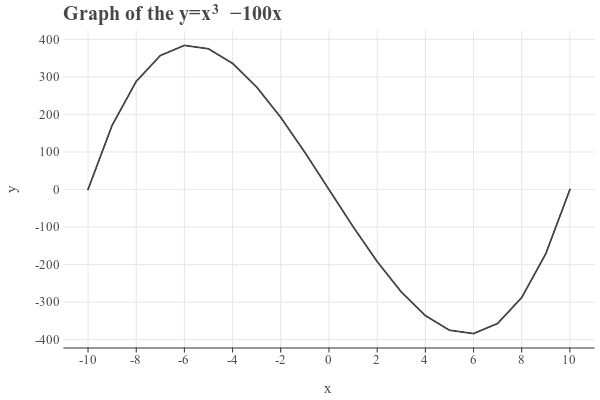

In [9]:
power_df = {'x': list(range(-10, 11))}
p = ggplot() + \
    geom_function(aes(x='x'), data=power_df, fun=lambda x: x**3 - 100 * x) + \
    ggtitle("Graph of the \( y = x^3 - 100 x \)") + \
    theme(text=element_text(family="Times New Roman"), \
          plot_title=element_text(size=20, face='bold'))

show(p, "magick_power")

# Polar plot


Unsupported attribute `fill-rule` in Path
Unsupported attribute `clip-circle-jfx` in Group
Image saved to /home/ikupriyanov/Projects/lets-plot/docs/dev/notebooks/lets-plot-images/magick_polar.bmp


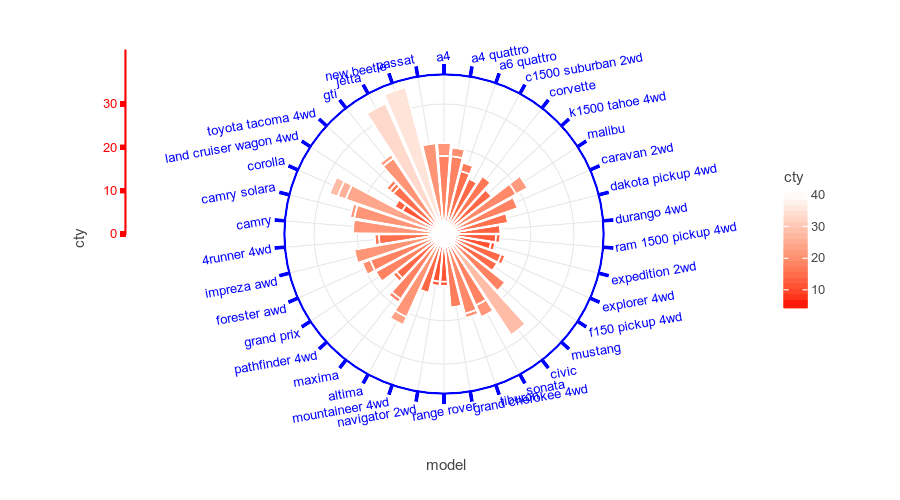

In [10]:
mpg = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv')
p = ggplot(mpg) \
    + geom_bar(aes(x='model', y='cty', fill='cty'), stat='identity', position='dodge') \
    + scale_fill_gradient(low='red', high='white', limits=(5,40)) \
    + theme(
        axis_line_y=element_line(color='red', size=2),
        axis_line_x=element_line(color='blue', size=2),
        axis_ticks_length_y=5,
        axis_ticks_length_x=10,
        axis_ticks_y=element_line(size=5, color='red'), 
        axis_ticks_x=element_line(size=3, color='blue'),
        axis_text_x=element_text(color='blue', angle=10),
        axis_text_y=element_text(color='red'),
        panel_inset=[20, 140, 30, 135]                      # New! Expand the panel to fit axis labels.
    ) \
    + ggsize(900, 500) \
    + coord_polar(transform_bkgr=False)                     # Keep the old school rectangular background.

show(p, "magick_polar")

# Curve


Unsupported attribute `fill-rule` in Path
Unsupported attribute `clip-bounds-jfx` in Group
Unsupported attribute `fill-rule` in Path
Unsupported attribute `clip-bounds-jfx` in Group
Unsupported attribute `fill-rule` in Path
Unsupported attribute `clip-bounds-jfx` in Group
Unsupported attribute `fill-rule` in Path
Unsupported attribute `clip-bounds-jfx` in Group
Unsupported attribute `fill-rule` in Path
Unsupported attribute `clip-bounds-jfx` in Group
Unsupported attribute `fill-rule` in Path
Unsupported attribute `clip-bounds-jfx` in Group
Image saved to /home/ikupriyanov/Projects/lets-plot/docs/dev/notebooks/lets-plot-images/magick_curve.bmp


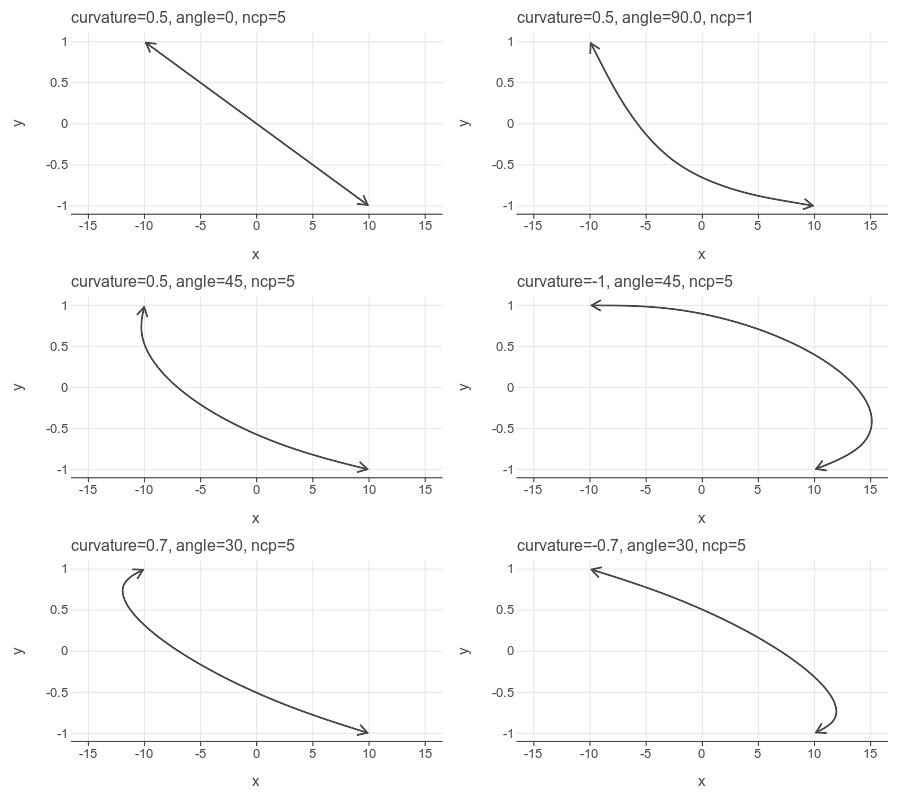

In [11]:
def curve_plot(curvature=0.5, angle=90.0, ncp=5):
    return ggplot() \
            + geom_curve(x=-10, y=1, xend=10, yend=-1, 
                         curvature=curvature, angle=angle, ncp=ncp,
                         arrow=arrow(ends='both')) \
            + ggtitle("curvature={0}, angle={1}, ncp={2}".format(curvature, angle, ncp)) \
            + xlim(-15,15)

p = gggrid([
    curve_plot(angle=0),
    curve_plot(ncp=1),
    curve_plot(angle=45),
    curve_plot(curvature=-1, angle=45),
    curve_plot(curvature=0.7, angle=30),
    curve_plot(curvature=-0.7, angle=30),
], ncol=2)

show(p, "magick_curve")

# imshow


Unsupported attribute `fill-rule` in Path
Unsupported attribute `clip-bounds-jfx` in Group
Unsupported attribute `preserveAspectRatio` in Group
Unsupported attribute `x` in Group
Unsupported attribute `y` in Group
Unsupported attribute `width` in Group
Unsupported attribute `height` in Group
Unsupported attribute `xlink:href` in Group
Image saved to /home/ikupriyanov/Projects/lets-plot/docs/dev/notebooks/lets-plot-images/magick_imshow.bmp


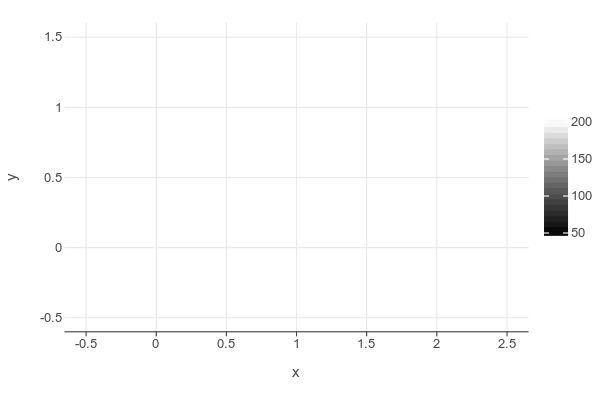

In [14]:
A2x3 = np.array([
    [50, 150 ,200],
    [200,100,50]
    ])

p = ggplot() + geom_imshow(A2x3)
show(p, "magick_imshow")